# Final Project Notebook - Spring 2024

In [2]:
import matplotlib.pyplot as plt #to generate plots
import imageio #to read and write image data
import torch #for tensor computations
import torchvision #for computer vision tasks
from torchvision import models, transforms #for pretrained models and image transformations
import numpy as np #for numerical operations
from torchvision.models import * #to handle image files
from PIL import Image #import the Image class from the Python Imaging Library (PIL) module
import requests #to make HTTP requests
from torchvision import models #import models from torchvision
from torchsummary import summary #to display model summaries

Documentation Block: plot(x) - Display a 2D image plot using the input matrix x.
    
    This function creates a figure and a set of subplots using matplotlib's pyplot submodule.
    It then displays the input data as a grayscale image on a 2D regular raster. The axis lines and labels are turned off
    to so the image can be seen clearly by itself. The figure size is set to 20x20 inches for a large display.
    
    The function is used for visualization of the output of various
    operations, like the application of a filter from a convolutional neural network layer to an image.
    
    Parameters:
    x (np.array): 2D array of pixel data, typically an image represented in grayscale.
    
    Returns:
    None: The function directly displays the figure with the image using plt.show().

In [3]:
def plot(x): #defining a plotting function (generate a 2D image plot using the input matrix x)
    fig, ax = plt.subplots()  #create a figure and a set of subplots
    im = ax.imshow(x, cmap='gray')  #display the data x as an image on a 2D regular raster with a grayscale color map
    ax.axis('off')  #turn off the axis lines and labels
    fig.set_size_inches(20, 20)  #set the figure size to be 20x20 inches
    plt.show()  #display the figure with the image

In [4]:
im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png') #use the imageio library to read an image from the specified URL and store it in the variable im

<ipython-input-4-c05ec0c6fc8e>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png') #use the imageio library to read an image from the specified URL and store it in the variable im


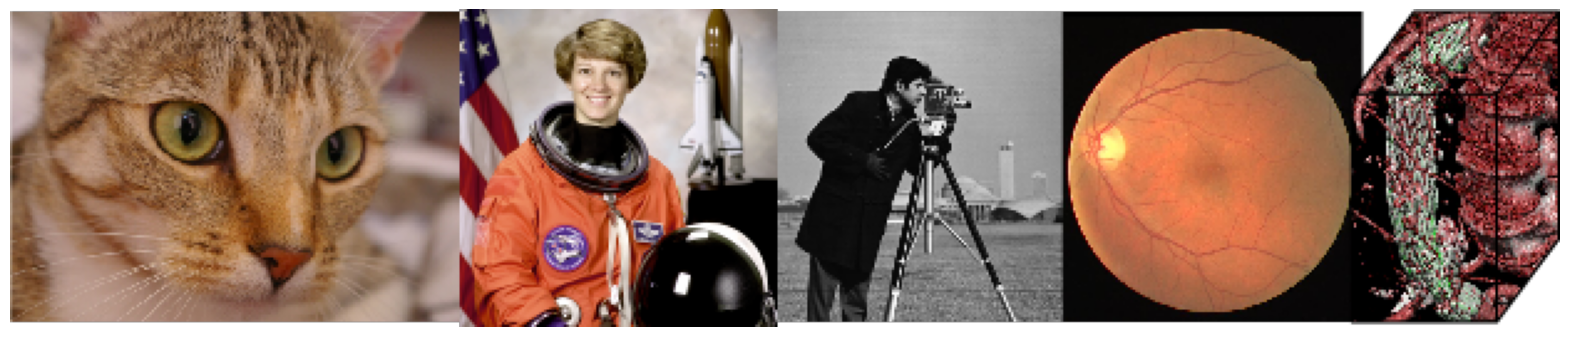

In [5]:
plot(im) #plots the image (im)

In [6]:
net = alexnet(pretrained=True).cuda(0) #load a pre-trained AlexNet model and prepare it for GPU processing

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 80.1MB/s]


In [7]:
normalize = transforms.Normalize( #define a normalization transform with the mean and standard deviation for each color channel (define the normalization parameters to be used on the input images)
    mean=[0.485, 0.456, 0.406],  #the mean is subtracted from each channel of the image
    std=[0.229, 0.224, 0.225]    #each channel of the image is then divided by these std values
)

preprocess = transforms.Compose([ #compose several transforms together to be applied on the image in sequence
    transforms.Resize(256),       #resize the image to 256 pixels on the shortest side
    transforms.CenterCrop(224),   #crop the image to a 224x224 square at the center
    transforms.ToTensor(),        #convert the image to a PyTorch tensor with values in [0, 1]
    normalize                     #apply the normalization defined above
])

In [8]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg') #read an image from the web into an array

<ipython-input-8-15cccff121c4>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg') #read an image from the web into an array


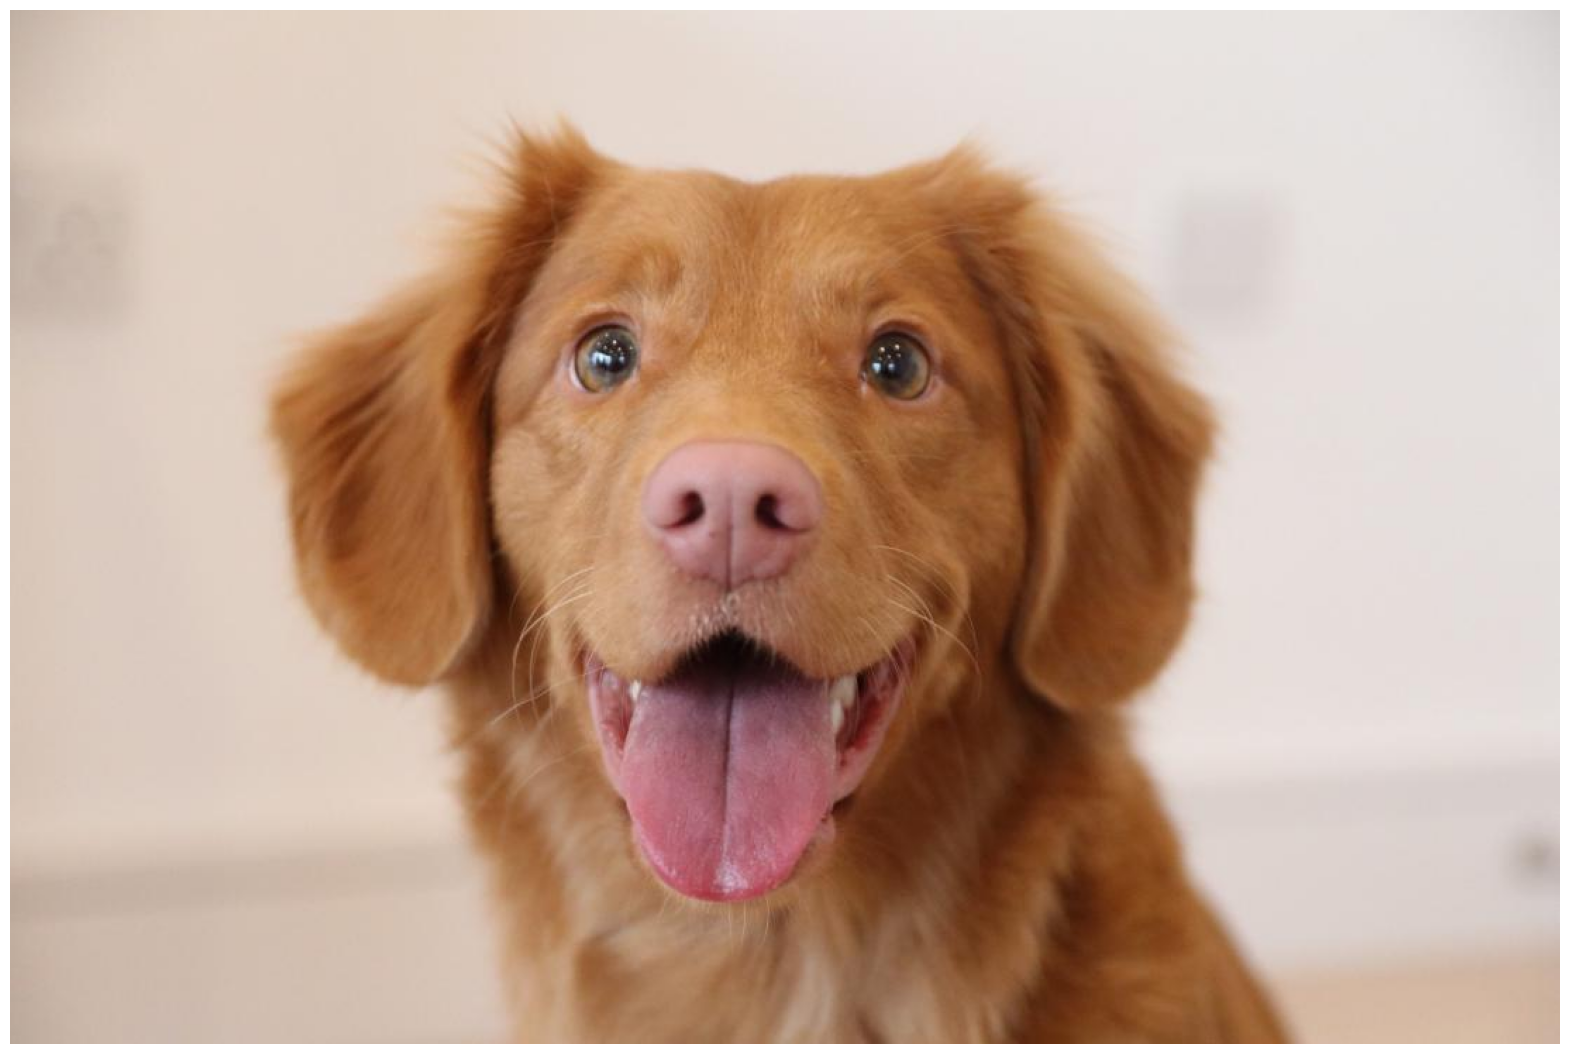

In [9]:
plot(im)  #plots the new image (im)

In [10]:
image = Image.fromarray(im) #convert to pil (read an image from a URL and convert it to a grayscale image for processing)

In [11]:
img_tensor = preprocess(image) #apply the preprocessing transformations to the PIL image

In [12]:
img_tensor = img_tensor.unsqueeze_(0) #add a batch dimension to the image tensor

In [13]:
img_tensor.shape #retrieve the shape of the tensor; it should be [1, 3, 224, 224] indicating a batch of 1 image with 3 color channels and 224x224 pixels in height and width

torch.Size([1, 3, 224, 224])

In [14]:
img_variable = torch.tensor(img_tensor).cuda(0) #convert the image tensor to a CUDA tensor

<ipython-input-14-c098c0715d11>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0) #convert the image tensor to a CUDA tensor


In [15]:
out = net(img_variable) #pass the image tensor to the neural network net to get the prediction

In [16]:
label_index = out.cpu().data.numpy().argmax() #move the network output back to CPU, convert to a numpy array, and find the index of the max probability

In [17]:
label_index #output from previous code, indicating the top prediction index

207

In [18]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:]) #get indices of the top 10 predictions in descending order

In [19]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json' #URL to the JSON file containing the labels

In [20]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()} #download the labels and create a dictionary converting string keys to integers

In [21]:
print(labels[label_index]) #print the readable label for the top prediction index (class name corresponding to label_index)

golden retriever


In [22]:
for i in range(10): #iterate over the top 10 predictions
    print(labels[top_list[i]]) #print the labels for the top 10 predictions

golden retriever
Sussex spaniel
Brittany spaniel
cocker spaniel, English cocker spaniel, cocker
Irish setter, red setter
Tibetan mastiff
chow, chow chow
clumber, clumber spaniel
tennis ball
Blenheim spaniel


In [23]:
net #shows representation of AlexNet's architecture

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [24]:
summary(net, (3, 224, 224)) #display a summary of the AlexNet model showing output shapes and parameter counts for each layer when input is 3-channel 224x224 image

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [25]:
out = net.features[0](img_variable).cpu().detach().numpy() #apply the first convolutional layer of the AlexNet to the image tensor, move the output to CPU, detach it from the current graph, and convert it to a NumPy array

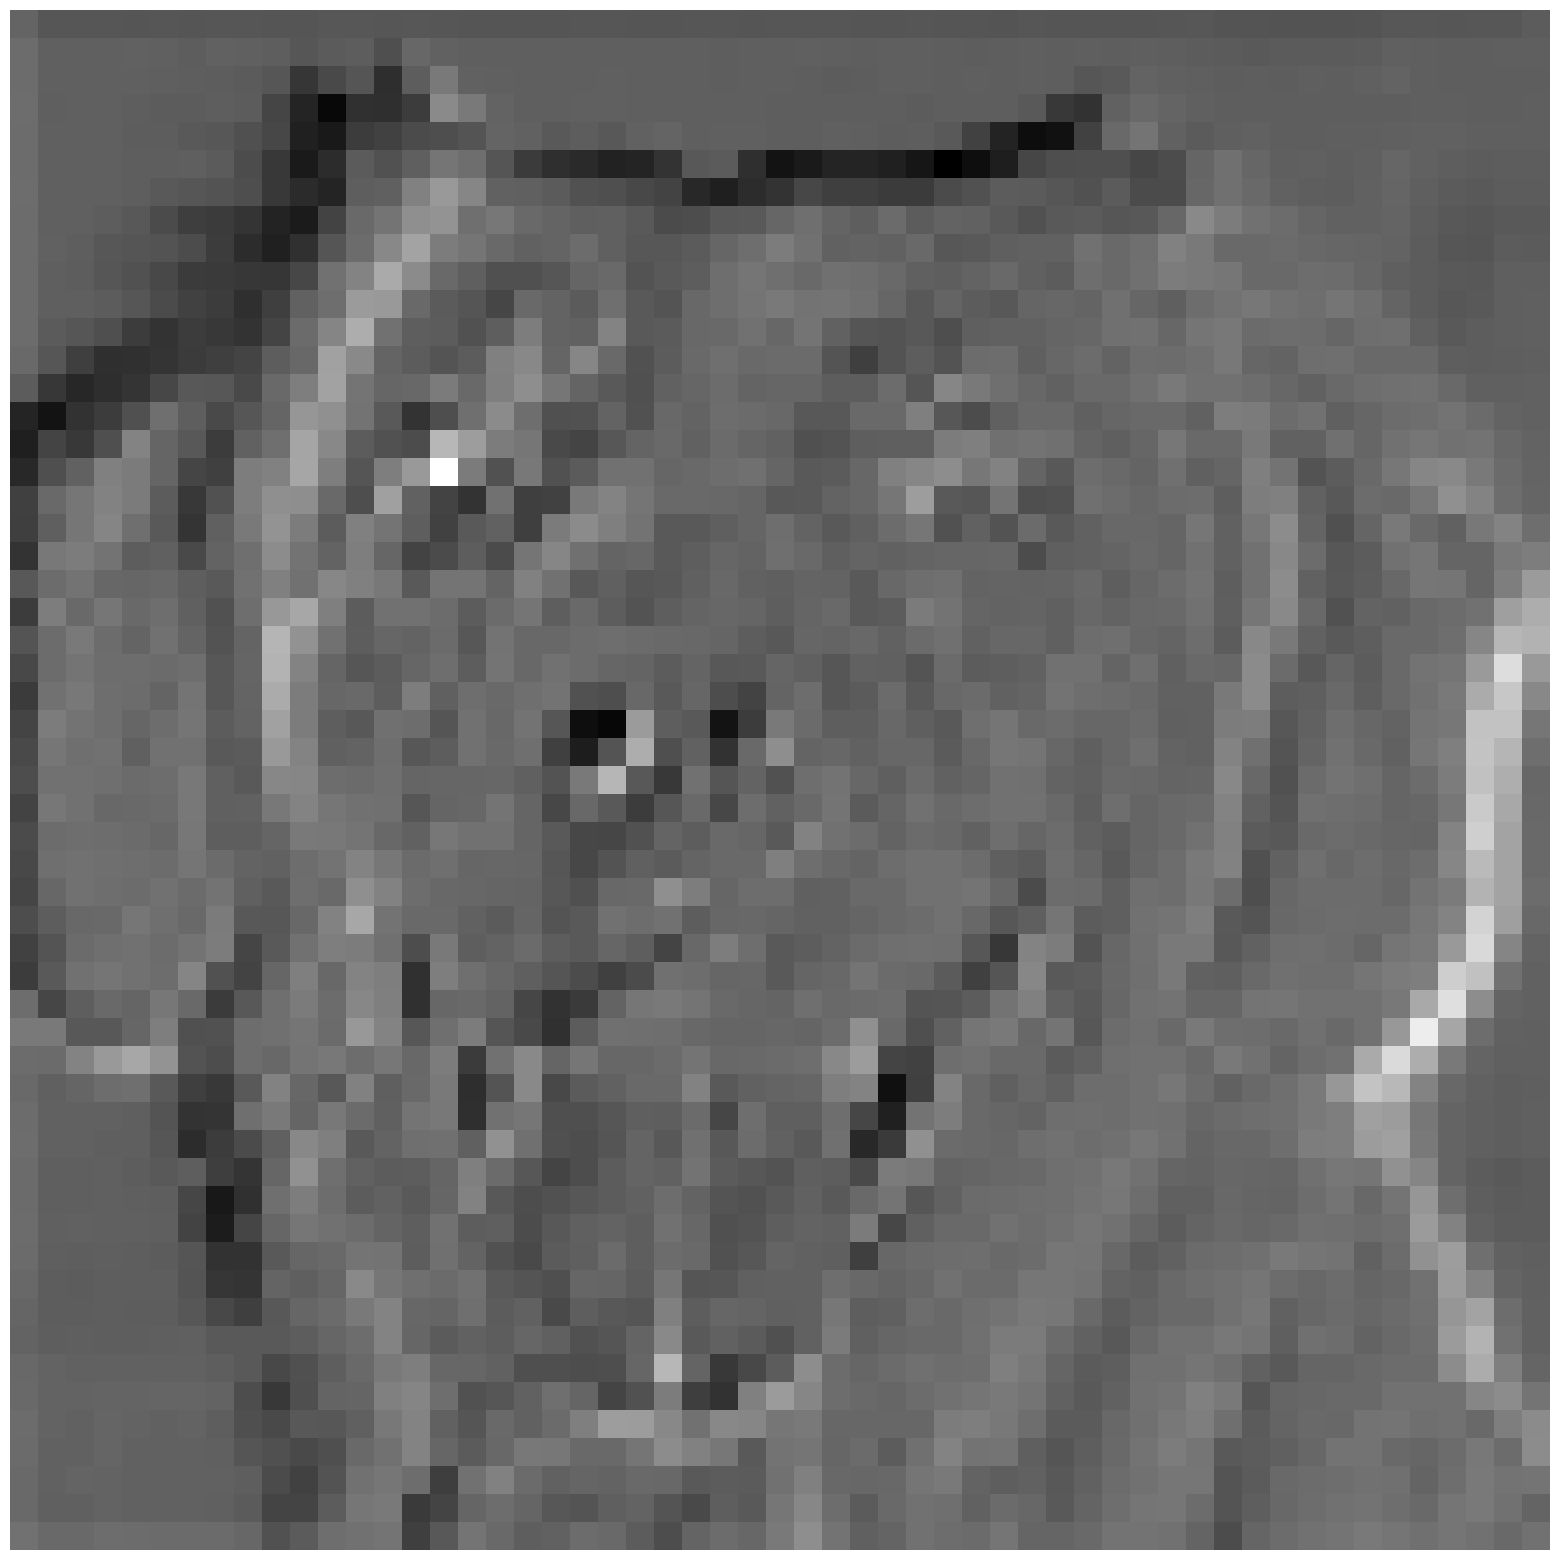

In [26]:
plot(out[0,0,:,:]) #call the plot function to visualize the output of the first filter of the first convolutional layer

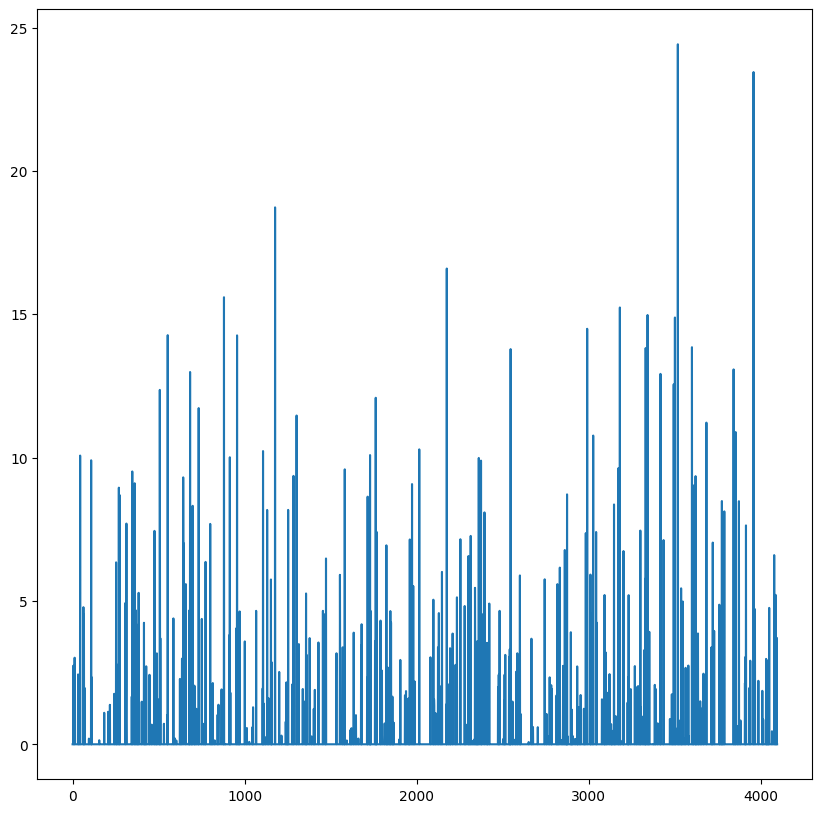

In [27]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy()) #plot the activations of the sixth layer of the classifier part of AlexNet after passing through all feature layers and the average pooling
fig = plt.gcf() #get the current figure object for further manipulation
fig.set_size_inches(10, 10) #set the size of the current figure

In [28]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php') #read an image from the specified URL into the variable im

<ipython-input-28-229f96e4cb76>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('http://bocasurfcam.com/most_recent_image.php') #read an image from the specified URL into the variable im


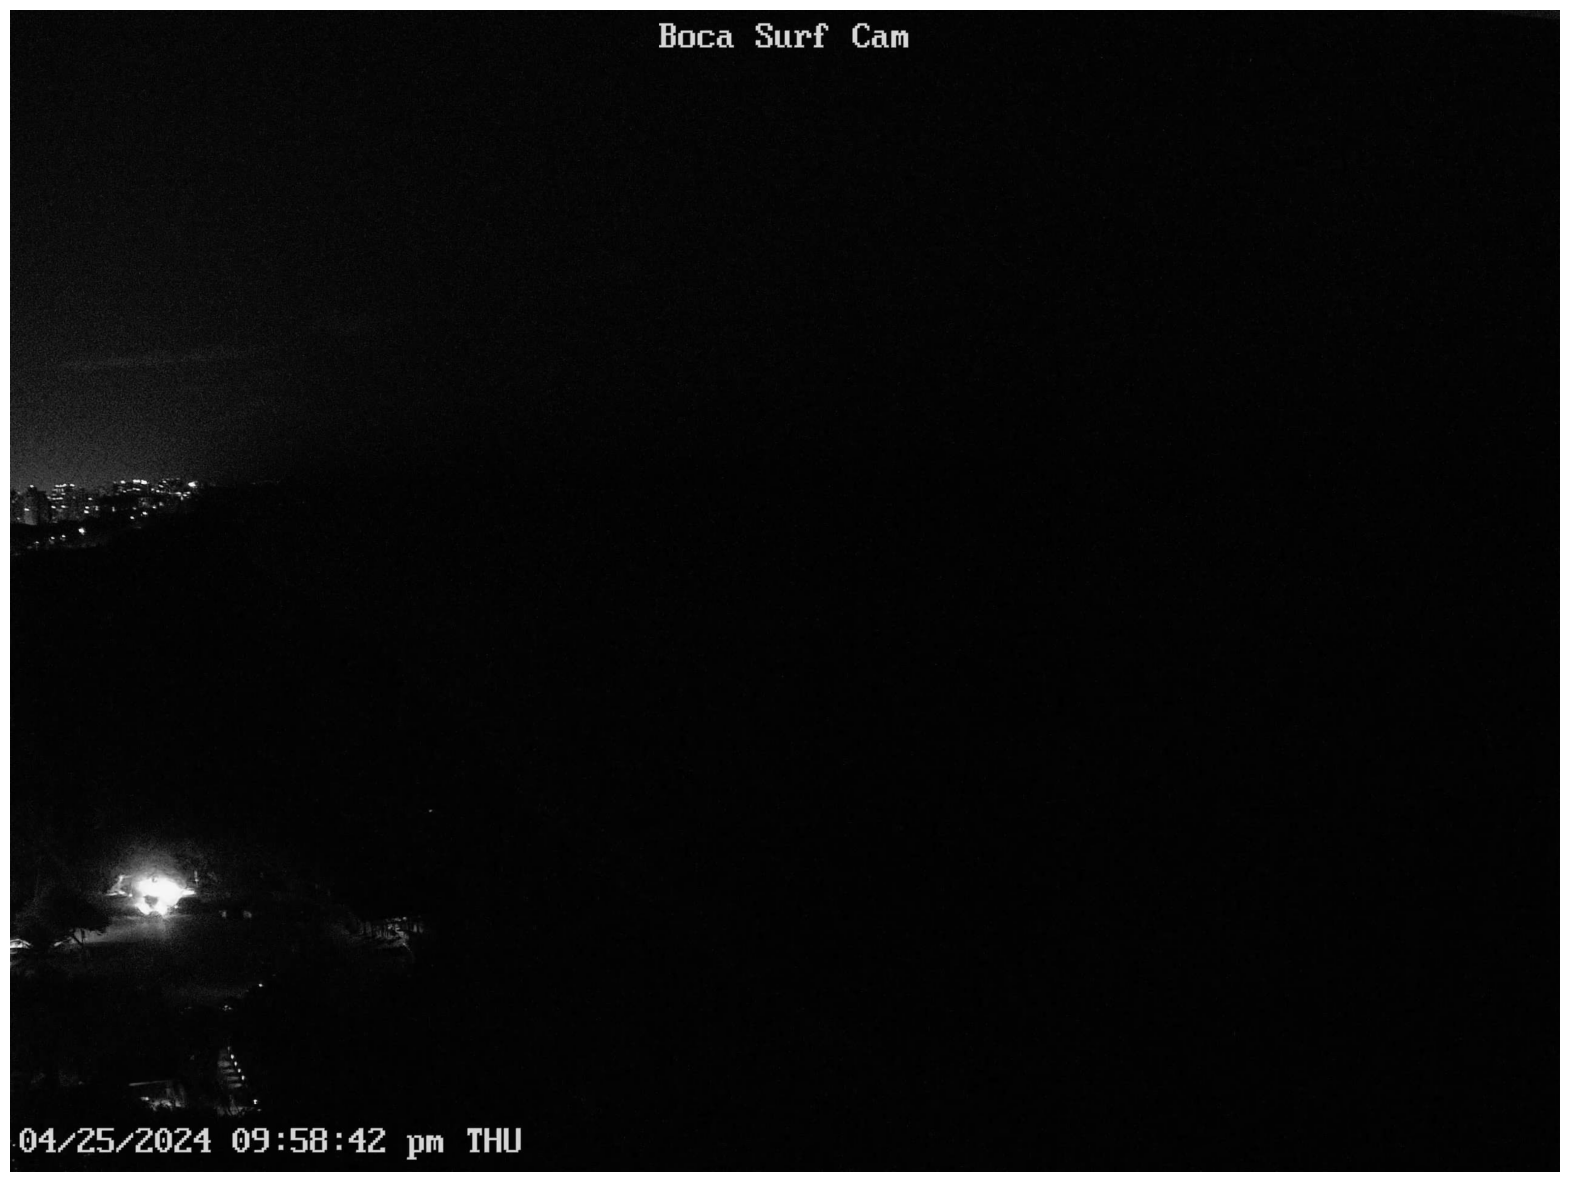

In [29]:
plot(im) #plots the new image (im)

Documentation Block: load_im(im) - Process an input image for model inference.

    Firstly, the input image array is converted to a PIL image. Then, preprocessing transformations are applied to the
    image, including normalization and resizing. The preprocessed image is then converted into a PyTorch tensor,
    unsqueezed to add a batch dimension, and transferred to GPU for acceleration.

    Parameters:
    im (np.array): Raw image data in array format to be processed.

    Returns:
    torch.Tensor: The processed image as a CUDA tensor ready for model inference.

In [30]:
def load_im(im): #define a function load_im
    image = Image.fromarray(im) #convert to pil (read an image from a URL and convert it to a grayscale image for processing)
    img_tensor = preprocess(image) #apply predefined preprocessing to the image
    img_tensor = img_tensor.unsqueeze_(0) #add a batch dimension to create a batch of size 1
    img_variable = torch.tensor(img_tensor).cuda(0) #convert the tensor to a CUDA tensor to use GPU acceleration
    return img_variable #return the CUDA tensor

In [31]:
out = net(load_im(im)) #use the network net to make a prediction on the processed image

<ipython-input-30-e064f2d19157>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0) #convert the tensor to a CUDA tensor to use GPU acceleration


Documentation Block: inference(im) - Perform inference on an input image using a pre-trained model.

    This function takes an image array, processes it for model compatibility, and then passes it through the pre-trained
    model to obtain predictions. Then it identifies the most fitting label and the top 10 predictions and it prints them out.

    Parameters:
    im (np.array): Image data array for which inference is to be performed.

    Returns:
    None: Prints the labels corresponding to the top 10 predictions.

In [32]:
def inference(im): #define an inference function (perform inference using a pre-trained model on the input image)
    out = net(load_im(im)) #et the model's predictions for the input image
    label_index = out.cpu().data.numpy().argmax() #find the index of the highest prediction score after moving the output to CPU and converting to numpy
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:]) #get the indices of the top 10 prediction scores
    print(labels[label_index]) #print the most likely label of the image
    print('____') #print a separator line
    for i in range(10): #iterate over the top 10 predictions
        print(labels[top_list[i]]) #print the labels corresponding to the top 10 predictions

In [33]:
inference(im) #call the inference function with the image im

nematode, nematode worm, roundworm
____
nematode, nematode worm, roundworm
matchstick
spotlight, spot
digital clock
lighter, light, igniter, ignitor
banana
tennis ball
Granny Smith
torch
microphone, mike


<ipython-input-30-e064f2d19157>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0) #convert the tensor to a CUDA tensor to use GPU acceleration


# Restart Notebook (Disconnect and Delete Runtime) Before Running Next Section

# Custom Data Deck

In [34]:
%%capture
!pip install wandb #installs weight and bias library
!apt-get install poppler-utils #installs utilities for PDF files
!pip install pdf2image #installs pdf to images library (convert)
!pip install flashtorch #install PyTorch-based visualizations
import requests #to make HTTP requests
from pdf2image import convert_from_path #to convert PDF files to images
import matplotlib.pyplot as plt #to generate plots
import numpy as np #for numerical operations
import torch #for tensor computations
import requests #to make HTTP requests
from torchvision import * #for computer vision
from torchvision.models import * #pretained models in torchvision
from flashtorch.utils import apply_transforms #imports a utility function from FlashTorch for applying image transformations
import wandb as wb #weight and bias libary

Documentation Block: GPU(data) - Converts the input data into a PyTorch tensor that is compatible with GPU operations and enables gradient computation.
    
    This function transfers the input data to the GPU and converts it into
    a tensor, specifying that gradients should be tracked for this tensor (typically used for neural network training).
    
    Parameters:
    data (array-like): The input data that needs to be converted to a tensor. This could be a list, NumPy array, or a PyTorch tensor already on the CPU.
    
    Returns:
    torch.Tensor: The input data as a PyTorch tensor on the GPU with requires_grad set to True.

Documentation Block: GPU_data(data) - Processes an input data array for model inference using predefined preprocessing steps and moves the tensor to GPU.

    This function takes input data and converts it to a PIL image if it is image data, and then applies a series
    of predefined preprocessing steps which may include resizing, cropping, normalization, etc. If the input data is not an image,
    then transformations are applied to match model input requirements. Then the code ensures the data is in tensor
    form, adds a batch dimension if needed, making it suitable for model input, and converts it to a CUDA tensor for
    GPU acceleration.

    Parameters:
    data (array-like or PIL.Image): Data typically read from an image file, array, or a URL. This could be raw
    image data in array format, a PIL Image object, or any array-like structure that contains model input data.

    Returns:
    torch.Tensor: Preprocessed data as a PyTorch tensor ready for model inference on GPU. If the input is already a
    PyTorch tensor, it is simply moved to the GPU.

In [35]:
def GPU(data): #defines a fucntion GPU (transfers data to a GPU device for accelerated computation)
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda')) #this function converts data into a PyTorch tensor that requires gradient computation

def GPU_data(data): #defines a function GPU_data (converts data into a PyTorch tensor formatted for use on a GPU)
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda')) #this function converts data into a PyTorch tensor that does not require gradient computation

In [36]:
def plot(x): #define a plotting function (generate a 2D image plot using the input matrix x)
    fig, ax = plt.subplots() #create a new figure and a set of subplots
    im = ax.imshow(x, cmap = 'gray') #displays the image x with a gray colormap
    ax.axis('off') #turn off the axis to not show the scale on the image
    fig.set_size_inches(5, 5) #set the size of the figure to 5x5 inches
    plt.show() #display the figure with the image

Documentation Block: get_google_slide(url) - Constructs a URL to export a Google Slides presentation as a PDF.

    This function takes a URL to a Google Slides presentation and constructs a new URL that can be used to export
    the presentation as a PDF. It extracts the presentation ID and page ID from the provided URL and constructs the export
    URL.
    
    Parameters:
    url (str): The URL of the Google Slides presentation.
    
    Returns:
    str: The URL for exporting the presentation as a PDF.

Documentation Block: get_slides(url) - Retrieves images of slides from a Google Slides presentation.

    This function takes a URL pointing to a Google Slides presentation, generates a URL for PDF export using the
    get_google_slide function, makes a GET request to the export URL, saves the PDF content to a file, converts the
    PDF file to images at 500 DPI, and returns the list of images representing the slides.
    
    Parameters:
    url (str): The URL of the Google Slides presentation.
    
    Returns:
    list: A list of images representing the slides extracted from the presentation.

Documentation Block: load(image) - Prepares an image for input to a neural network.

    This function applies transformations to the input image using the apply_transforms function, clones the resulting
    tensor, detaches it from the computation graph, sets requires_grad to True to enable gradient computation, and moves
    it to the specified device (CPU or CUDA).
    
    Parameters:
    image: The input image to be prepared for input to a neural network.
    
    Returns:
    torch.Tensor: The prepared image tensor ready for input to a neural network.

In [37]:
def get_google_slide(url): #defines a function get_google_slide
    url_head = "https://docs.google.com/presentation/d/" #constructs a URL to export a Google Slides presentation as a PDF
    url_body = url.split('/')[5] #extracts the presentation ID from the provided URL
    page_id = url.split('.')[-1] #extracts the page ID from the provided URL
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id #returns the URL

def get_slides(url): #defines a function get_slides
    url = get_google_slide(url) #gets the URL for PDF export
    r = requests.get(url, allow_redirects=True) #makes a GET request to the export URL
    open('file.pdf', 'wb').write(r.content) #saves the PDF content to a file
    images = convert_from_path('file.pdf', 500) #converts the PDF file to images at 500 DPI
    return images #returns the list of images

def load(image): #defines a function load

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device) #applies transformations to an image and prepares it for input to a neural network

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #sets the device to CUDA if available, else CPU

In [38]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} #create a dictionary mapping integer class indices to readable class names by fetching the JSON file from the given URL and converting the string keys to integers

In [39]:
model = alexnet(weights='DEFAULT').to(device) #load the pre-trained AlexNet model from torchvision's model zoo with default weights, move it to the specified device (GPU or CPU)
model.eval(); #switch the model to evaluation mode, which disables layers like dropout and batch normalization, making it ready for inference

In [40]:
url = "https://docs.google.com/presentation/d/1P4j2N6uSwv88M_8yurO5d0tiWuL-DrlU0HVwh6cK1kg/edit#slide=id.p" #URL to Data Deck Google Slides Presentation (from Lab 8)

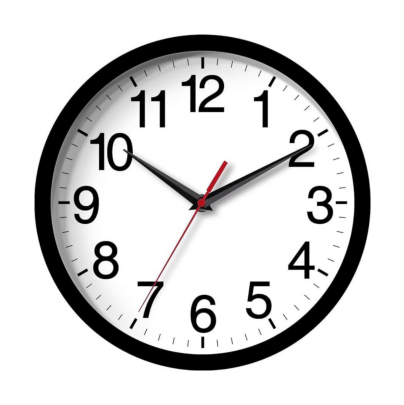

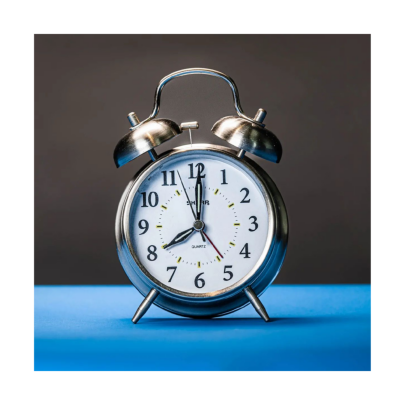

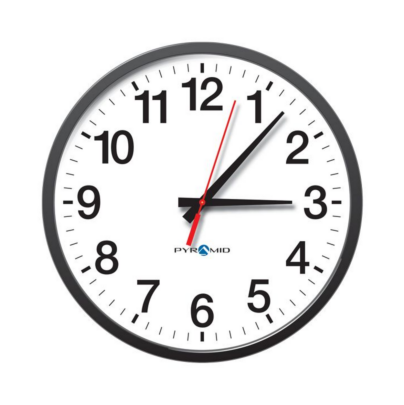

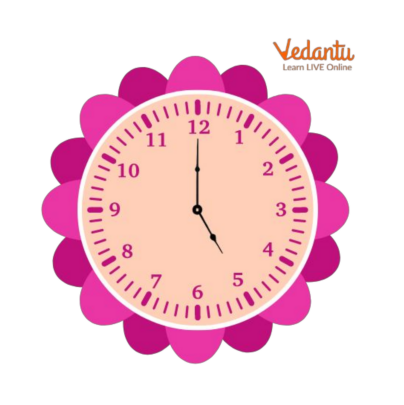

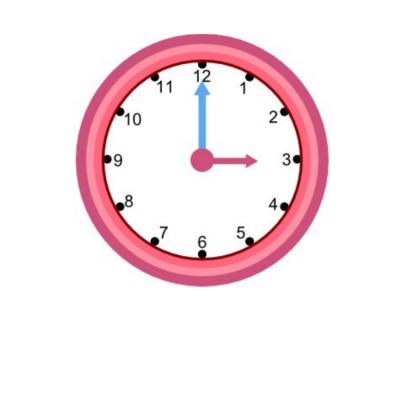

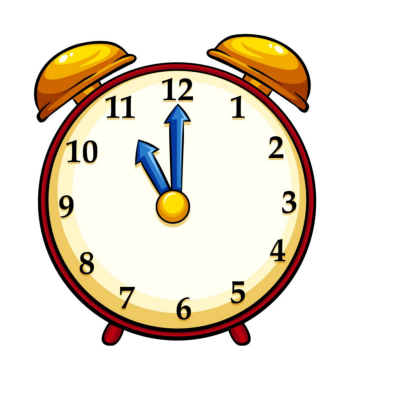

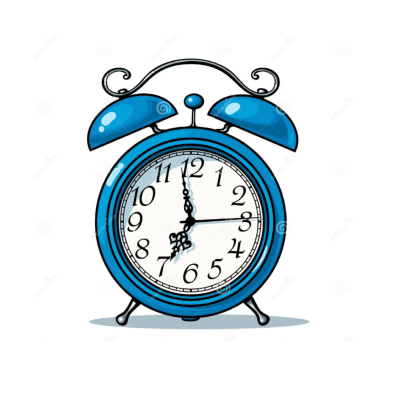

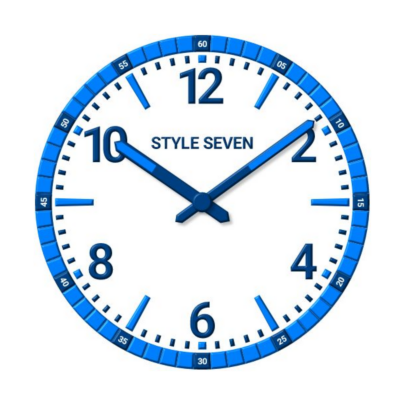

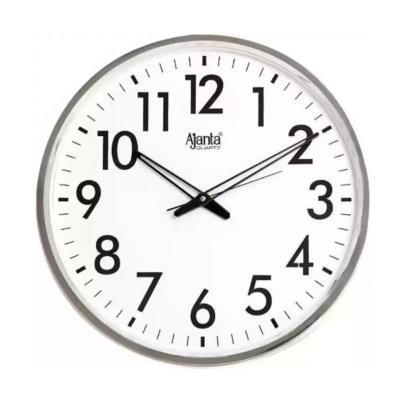

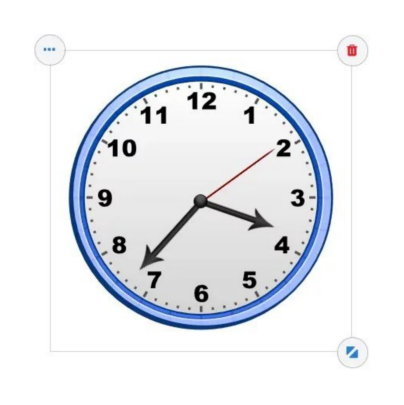

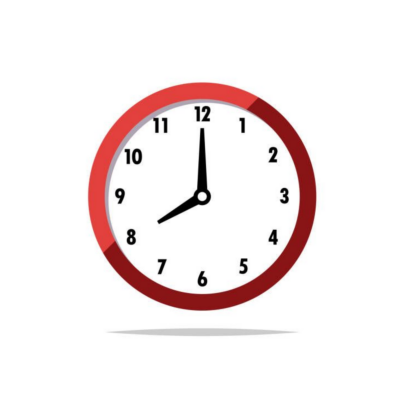

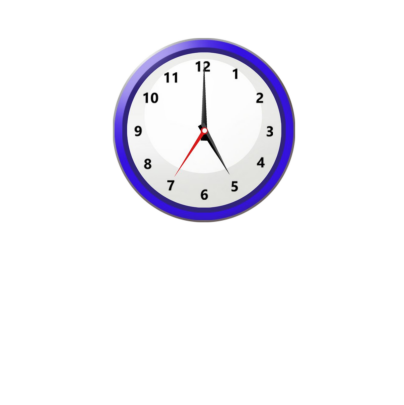

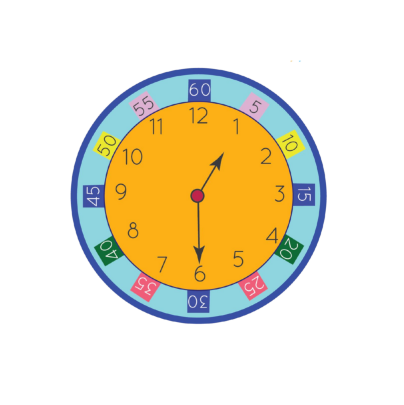

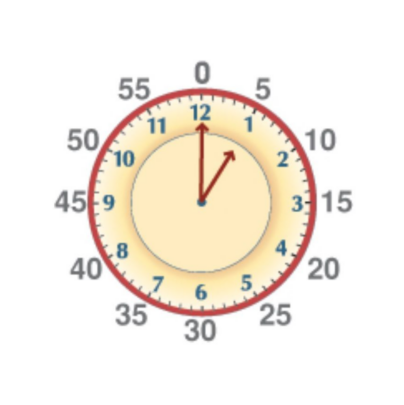

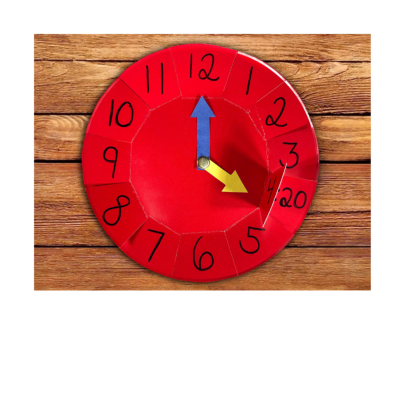

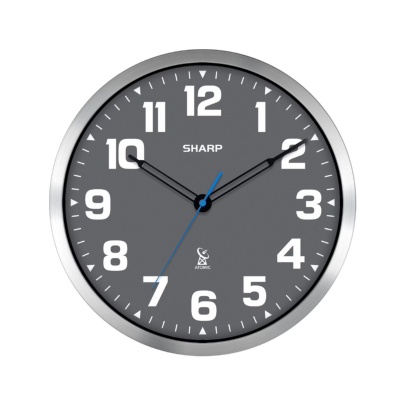

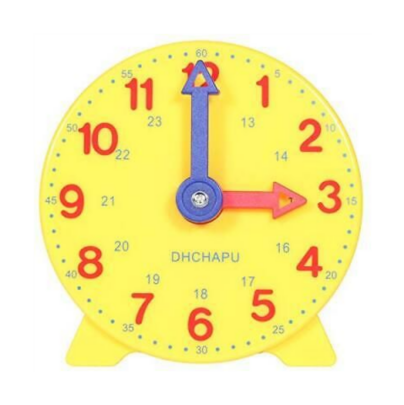

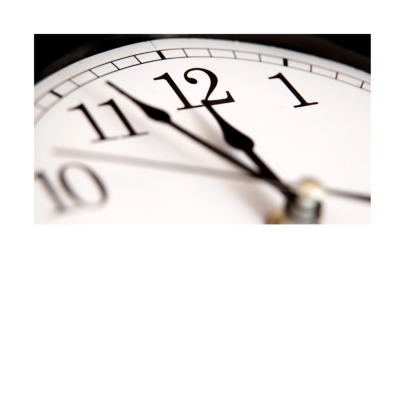

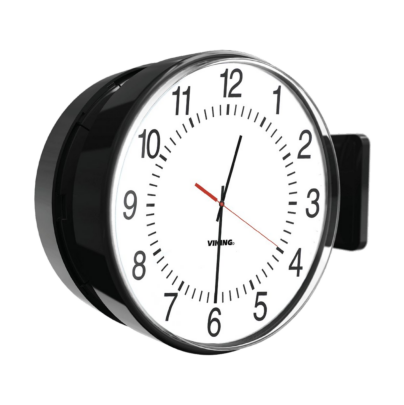

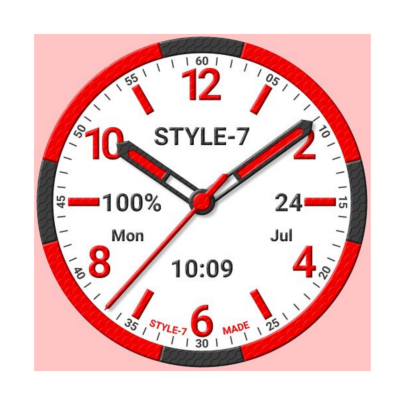

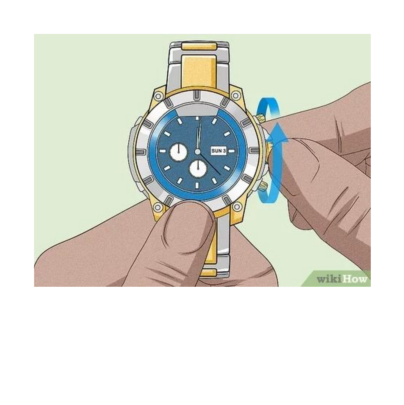

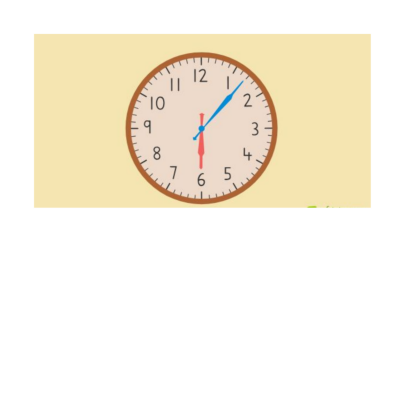

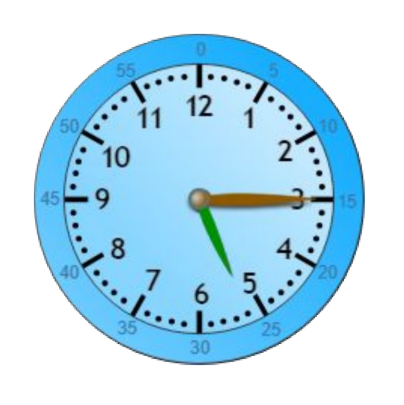

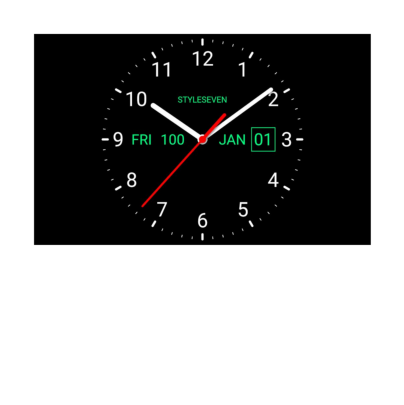

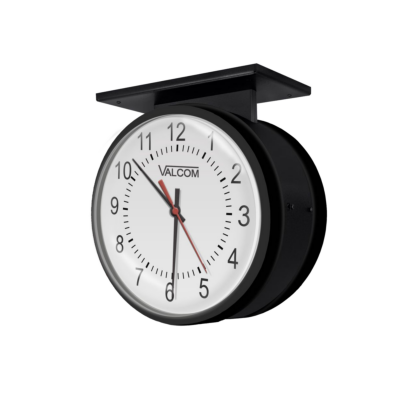

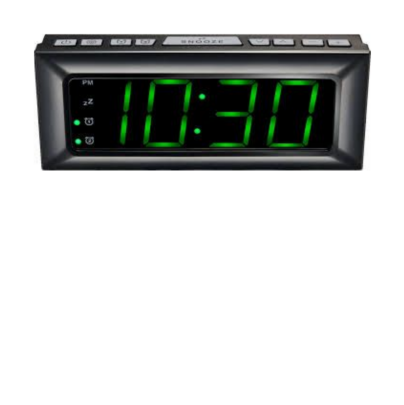

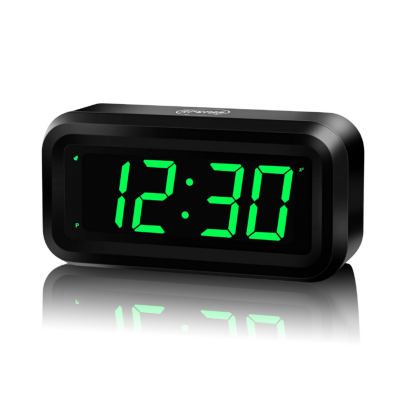

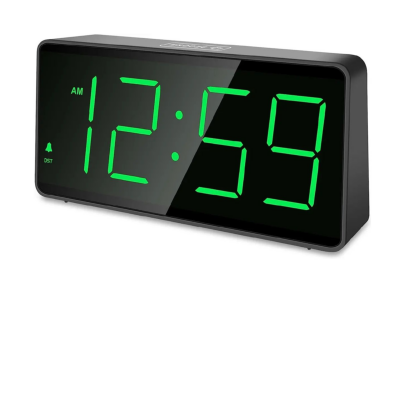

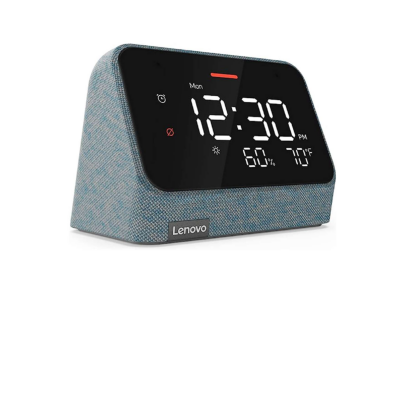

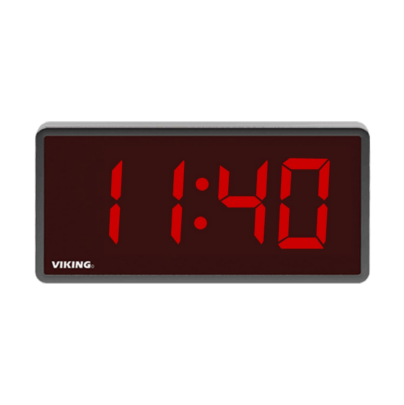

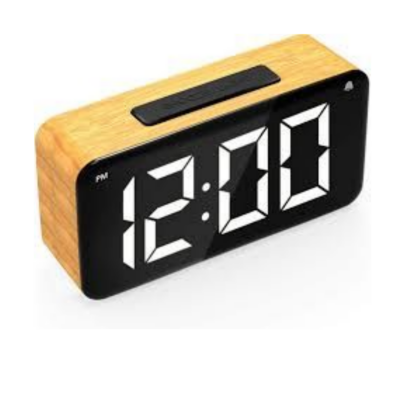

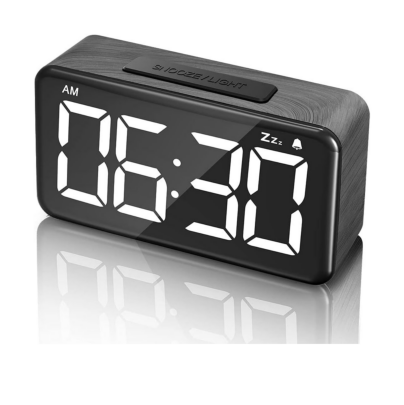

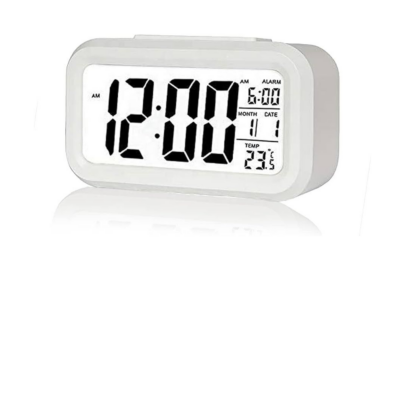

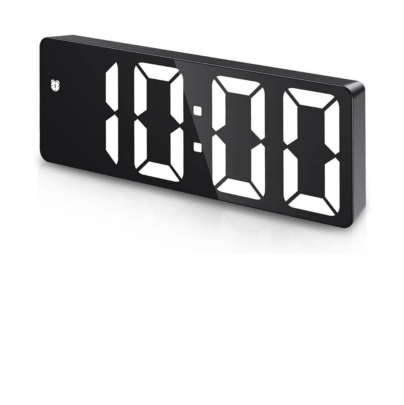

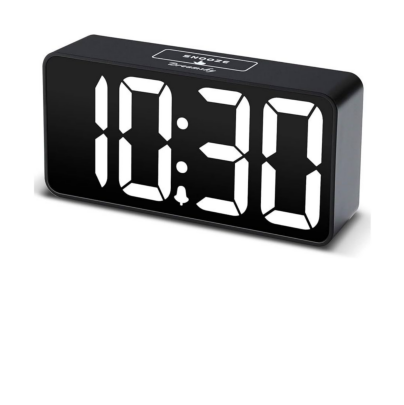

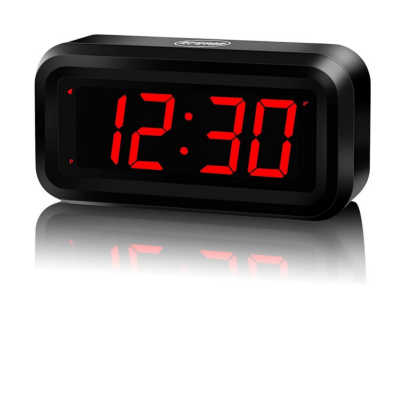

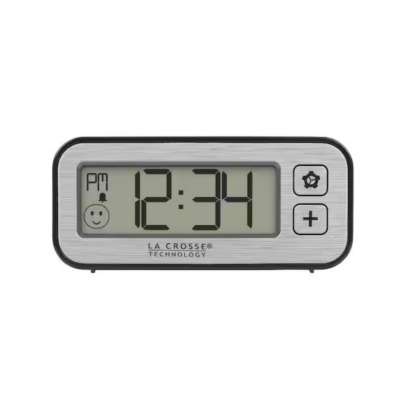

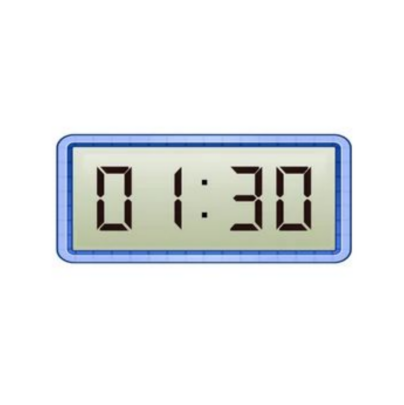

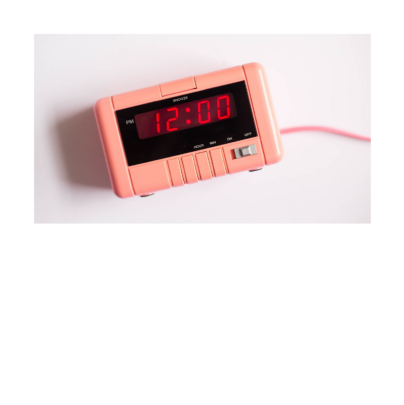

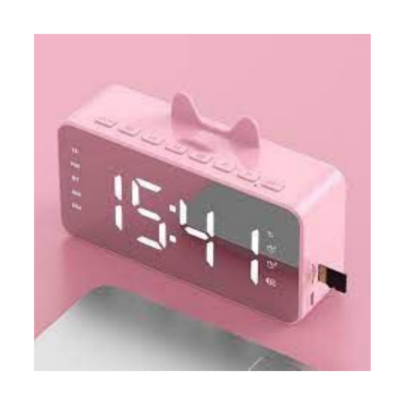

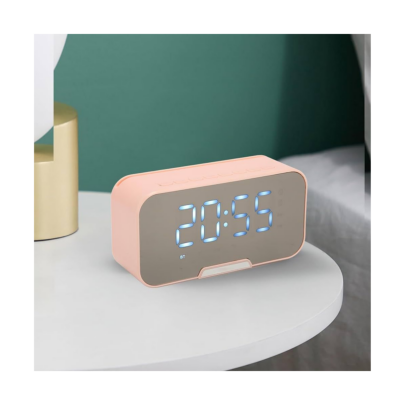

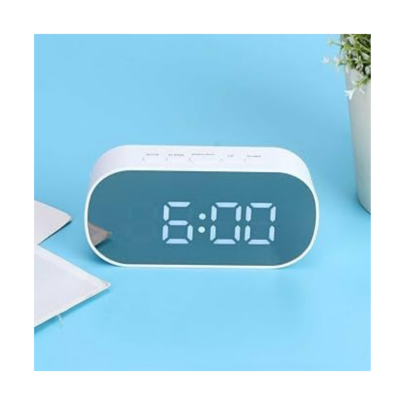

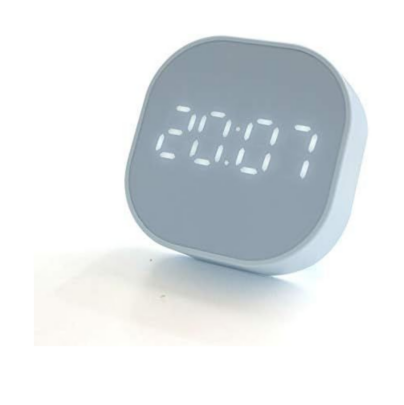

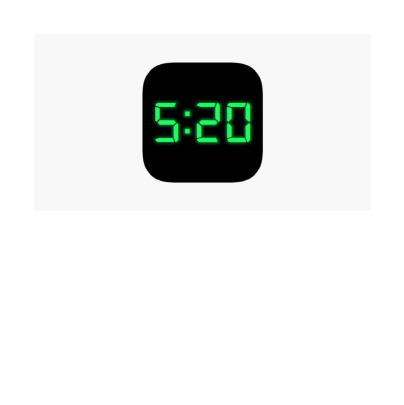

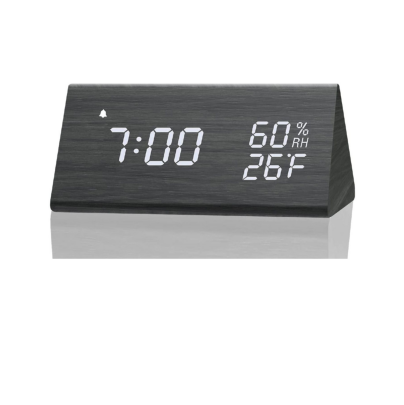

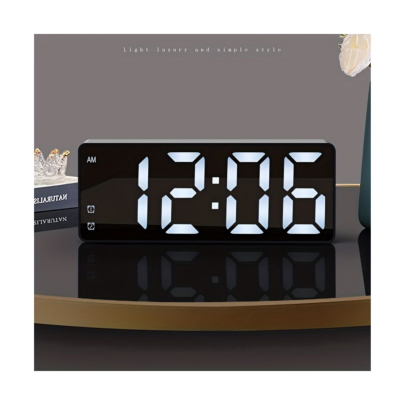

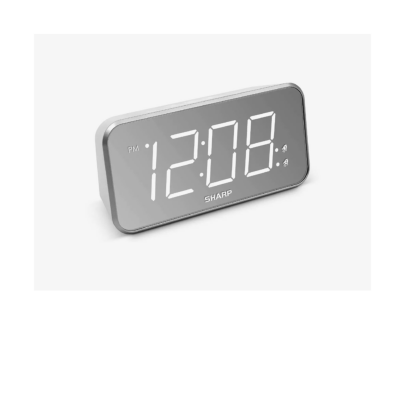

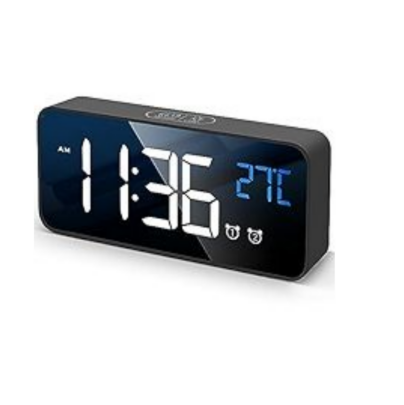

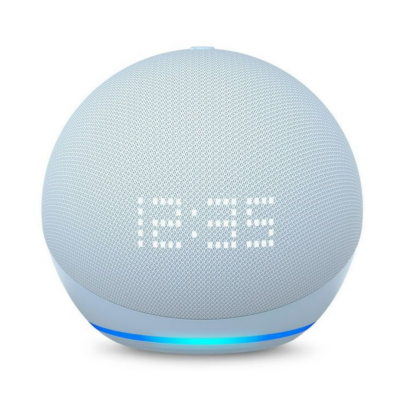

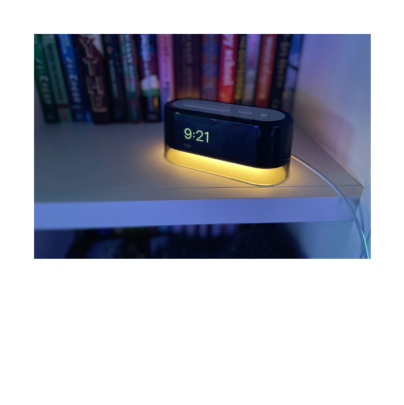

In [41]:
images = [] #initialize an empty list to store processed images

for image in get_slides(url): #iterate over each image obtained from the get_slides function

    plot(image) #display the image using the plot function defined earlier

    images.append(load(image)) #apply the load function to the image and append the processed image to the list

images = torch.vstack(images) #stack all the processed images into a single tensor

In [42]:
images.shape #check the shape of the images tensor, expecting a batch size of 50 with 3 color channels and 224x224 dimensions

torch.Size([50, 3, 224, 224])

In [43]:
model(images) #pass the images tensor through the model to get predictions (output is a tensor of logits)

tensor([[-4.4616, -4.4237, -1.9344,  ..., -0.2022,  2.1472,  5.3740],
        [-3.5248, -4.0392,  0.3698,  ..., -3.0897, -3.3502,  2.7341],
        [-3.4528, -3.0763, -1.5938,  ...,  0.7691,  1.1747,  4.0479],
        ...,
        [-5.0217, -6.5983, -2.2989,  ..., -4.9940, -1.6407,  4.4286],
        [-1.1662, -0.7160, -2.6015,  ..., -3.0979, -1.6450,  7.9256],
        [-1.9837, -2.8781, -3.0001,  ..., -4.4705,  0.3612,  2.6387]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [44]:
y = model(images) #store the model's predictions for images in the variable y

In [45]:
y.shape #check the shape of the y tensor to confirm it matches the expected number of predictions (50 predictions, each with 1000 classes for ImageNet)

torch.Size([50, 1000])

In [46]:
guesses = torch.argmax(y, 1).cpu().numpy() #get the index of the highest logit value in each prediction to find the predicted class, move the tensor to CPU, and convert it to a numpy array

In [47]:
for i in list(guesses): #iterate through the predicted class indices in guesses
    print(labels[i]) #print the readable label for each prediction from the labels dictionary

analog clock
analog clock
analog clock
wall clock
wall clock
wall clock
analog clock
analog clock
analog clock
analog clock
wall clock
analog clock
wall clock
analog clock
wall clock
analog clock
wall clock
analog clock
analog clock
analog clock
electric fan, blower
analog clock
analog clock
analog clock
analog clock
digital clock
digital clock
digital clock
digital clock
digital clock
digital clock
digital clock
digital clock
street sign
digital clock
digital clock
digital clock
digital clock
digital clock
digital clock
rubber eraser, rubber, pencil eraser
street sign
digital clock
digital clock
digital clock
digital clock
digital clock
digital clock
CD player
digital clock


In [48]:
Y = np.zeros(50,) #create a numpy array Y of length 50 initialized with zeros
Y[25:] = 1 #set the second half of the array Y to ones

In [49]:
Y #display the array y to check its contents (the first half of the array has zeros and the second half has ones)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
X = y.detach().cpu().numpy() #assuming y is a PyTorch tensor, detach it from the computation graph, move it to CPU, and convert it to a numpy array X

In [51]:
X.shape #check the shape of the array X, which is expected to be (50,)

(50, 1000)

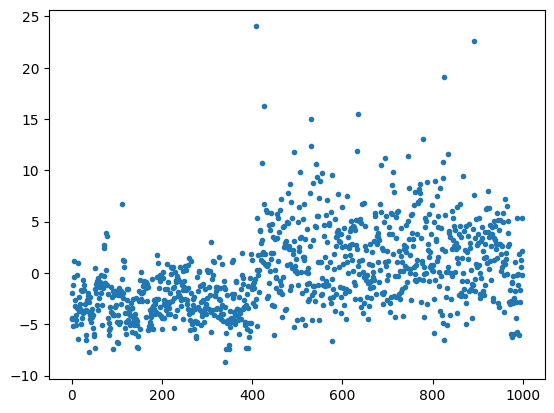

In [52]:
plt.plot(X[0],'.') #plot the first element of array X as a scatter plot with dot markers

In [53]:
X[0] #access the first element of the array or tensor X

array([-4.46155167e+00, -4.42374277e+00, -1.93443739e+00, -5.17901516e+00,
       -1.15609086e+00,  1.20892513e+00, -3.95484269e-01, -2.64265013e+00,
       -3.19838762e+00, -4.62627459e+00, -4.07910156e+00, -5.09474182e+00,
       -3.45196056e+00, -2.40244597e-01, -6.45559645e+00,  9.66261446e-01,
       -2.38182878e+00, -3.66547728e+00, -3.04717541e+00, -3.49914002e+00,
       -4.95707130e+00, -3.62182117e+00, -1.62944698e+00, -1.75477934e+00,
       -4.35511160e+00, -3.87267590e+00, -6.53598130e-01, -1.15783000e+00,
       -1.68597710e+00, -3.05843830e+00, -3.69831038e+00, -6.04696751e+00,
       -6.50570869e+00, -3.56288552e+00, -3.73034310e+00, -2.60561657e+00,
       -2.25043869e+00, -1.94256115e+00, -2.85993791e+00, -7.72101450e+00,
       -4.13028002e+00, -2.32399178e+00, -4.46913290e+00, -3.80766726e+00,
       -4.80331802e+00, -4.25771427e+00, -3.52133942e+00, -4.13302422e+00,
       -5.34787130e+00, -5.94633579e+00, -6.14126730e+00, -7.31344891e+00,
        5.20808160e-01, -

In [54]:
np.argmax(X[0]) #get the index of the maximum value in the first array of X

409

In [55]:
labels[948] #access the label corresponding to the class index 948 in the labels dictionary

'Granny Smith'

In [56]:
top_ten = np.argsort(X[0])[::-1][0:10] #correct the slicing to get the indices of the top ten scores

In [57]:
for i in top_ten: #iterate over the top_ten indices
    print(labels[i]) #print the corresponding labels from the labels dictionary

analog clock
wall clock
stopwatch, stop watch
barometer
magnetic compass
digital clock
scale, weighing machine
digital watch
loupe, jeweler's loupe
chime, bell, gong


In [58]:
labels #displays the entire labels dictionary

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 46., 288., 331., 188., 106.,  28.,   7.,   3.,   1.,   2.]),
 array([-8.72612381, -5.45092344, -2.17572284,  1.09947753,  4.37467813,
         7.6498785 , 10.92507935, 14.20027924, 17.47547913, 20.75068092,
        24.02588081]),
 <BarContainer object of 10 artists>)

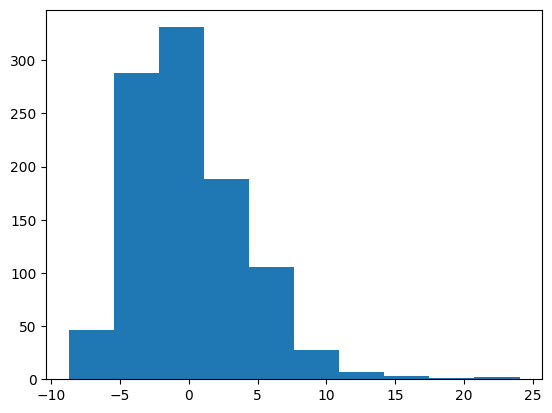

In [59]:
plt.hist(X[0]) #plots a histogram of the values in the first element of the array X

In [60]:
X = GPU_data(X) #transfer the input data X to the device (GPU/CPU) for computation
Y = GPU_data(Y) #transfer the input data Y to the device (GPU/CPU) for computation

Documentation Block: softmax(x) - Apply the softmax function to an input tensor x.

    The softmax function maps ℝ^n to the (n-1)-simplex and is used to convert a vector of raw scores (logits) into
    a distribution of probabilities that sum to 1. This implementation includes a numerical stability trick by
    subtracting the maximum value in each row before exponentiation to prevent overflow or underflow.

    Parameters:
    x (torch.Tensor): A tensor of logits to apply softmax to, often the output of a network's last linear layer.
    
    Returns:
    torch.Tensor: The resulting tensor after applying the softmax function, representing a probability distribution.

In [61]:
def softmax(x): #apply the softmax function to an input tensor x
    s1 = torch.exp(x - torch.max(x,1)[0][:,None]) #subtract the max for numerical stability, and exponentiate x
    s = s1 / s1.sum(1)[:,None] #normalize the exponentiated values so that they sum up to 1 over the second dimension
    return s #outputs s

Documentation Block: cross_entropy(outputs, labels) - Calculate the cross-entropy loss between the predicted outputs and the true labels.

    Cross-entropy loss measures the performance of a classification model whose output is a probability value between 0 and 1.
    Cross-entropy loss increases as the predicted probability diverges from the actual label, with a perfect model having
    a cross-entropy loss of 0. This function applies softmax to the outputs to get the probabilities, then computes the
    negative log likelihood of the correct classes, and averages the result over all examples in the batch.
    
    Parameters:
    outputs (torch.Tensor): The logits as predicted by the model. The outputs before applying the softmax.
    labels (torch.Tensor): The true labels corresponding to the inputs of the model. Should be class indices.
    
    Returns:
    torch.Tensor: The average cross-entropy loss for the batch.

In [62]:
def cross_entropy(outputs, labels): #calculate the cross-entropy loss given the outputs from the network and the target labels
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0] #uses the negative log likelihood of the softmax of the outputs, averaged over all examples

Documentation Block: Truncated_Normal(size) -  Generates random values from a truncated normal distribution given a size.
    
    This function uses the Box-Muller transform, which allows for the generation of standard normally distributed random
    numbers from uniformly distributed random numbers. The normal distribution is truncated at 2 standard deviations to
    limit the range of generated values. This can be useful when initializing weights in a neural network to avoid very
    large values that could adversely affect training.
    
    Parameters:
    size (tuple of ints): The dimensions of the tensor to be generated.
    
    Returns:
    torch.Tensor: A tensor containing random values from a truncated normal distribution

In [63]:
def Truncated_Normal(size): #generates random numbers from a truncated normal distribution given a size

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2) #generate a tensor of random values from a uniform distribution, scaled to the range of the standard normal distribution truncated at 2 standard deviations
    u2 = torch.rand(size) #generate a second tensor of random values from a standard uniform distribution
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2) #apply the Box-Muller transform to convert uniform random values to a normal distribution, which is then truncated

    return z #return the tensor of truncated normal random values

Documentation Block: acc(out,y) - Calculates the accuracy of the predictions out against the true labels y.
    
    Accuracy is computed as the ratio of correct predictions to the total number of samples. The function
    assumes that out contains raw scores or logits which are converted to predicted class indices through the argmax function,
    and compares these to the true labels. This is primarily used for evaluating classification models.
    
    Parameters:
    out (torch.Tensor): The logits predicted by the model as a 2D tensor where each row corresponds to a sample.
    y (torch.Tensor): The true labels as a 1D tensor of class indices.
    
    Returns:
    float: The computed accuracy as a float value between 0 and 1

In [64]:
def acc(out,y): #calculate the accuracy of the predictions out against the true labels y
    with torch.no_grad(): #disable gradient calculation as it is not needed for evaluation
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0] #compute the number of correct predictions and divide by the total number of predictions to get the accuracy

In [65]:
X.shape #check the shape of the data tensor X to ensure it matches the expected structure for input into the model

torch.Size([50, 1000])

Documentation Block: get_batch(mode) -  Fetches a batch of data for training or testing.

    This function retrieves a batch of input data and corresponding labels based on the specified mode (train or test).
    For the training mode, it randomly selects a starting index within the training data and slices the input data and
    labels to create a batch of the specified size. For the testing mode, it performs the same operation on the testing data.
    
    Parameters:
    mode (str): The mode indicating whether to fetch a batch for training (train) or testing (test).
    
    Returns:
    tuple: A tuple containing the batch of input data (x) and corresponding labels (y)

In [66]:
def get_batch(mode): #creates a function get_batch (fetches a batch of data for training or testing)
    b = c.b #define the batch size
    if mode == "train": #checks if the mode is train
        r = np.random.randint(X.shape[0]-b) #randomly select a starting index r for a batch from the training data
        x = X[r:r+b,:] #slice the X array to create a batch of input data of size b
        y = Y[r:r+b] #slice the Y array to get the corresponding labels for the batch
    elif mode == "test": #checks if the mode is test
        r = np.random.randint(X_test.shape[0]-b) #randomly select a starting index r for a batch from the testing data
        x = X_test[r:r+b,:] #slice the X_test array to create a batch of input data of size b
        y = Y_test[r:r+b] #slice the Y_test array to get the corresponding labels for the batch
    return x,y #returns the batch of inputs data x and corresponding labels y

Documentation Block: model(x,w) - Defines a linear prediction model by computing the dot product of inputs and weights.

    This model is an example of linear regression without an intercept. It is used primarily for demonstrating
    basic neural network operations like matrix multiplications.

    Parameters:
    x (torch.Tensor): The input data, a batch of examples.
    w (torch.Tensor): The weights of the model, typically learned during training.

    Returns:
    torch.Tensor: The predicted outputs as the dot product of input data and weights.

In [67]:
def model(x,w): #defines a function model

    return x@w[0] #returns the dot product of input x with weights w

Documentation Block: make_plots() - Generate and display plots for model training metrics.

    This function could plot various metrics such as training accuracy over epochs. This is typically used to plot libraries using
    data logged during the training process.

    Parameters:
    None

    Returns:
    None: Displays plots of training metrics

In [68]:
def make_plots(): #defines a function make_plots

    acc_train = acc(model(x,w),y) #calculate the training accuracy using the 'acc' function and the 'model'

    wb.log({"acc_train": acc_train}) #log the training accuracy using Weights & Biases

In [69]:
wb.init(project="Linear_Model_Photo_1"); #initialize Weights & Biases for experiment tracking, with the project name "Linear_Model_Photo_1"
c = wb.config #set up configuration in Weights & Biases
#configure the training parameters and initialize the weights and biases tracking
c.h = 0.001 #learning rate for the optimizer
c.b = 4 #batch size for training
c.epochs = 100000 #total number of training epochs

w = [GPU(Truncated_Normal((1000,2)))] #initialize the weights of the model using a truncated normal distribution and transfer to GPU

optimizer = torch.optim.Adam(w, lr=c.h) #set up the optimizer to use with the model (i.e. Adam, with the learning rate from the configuration)

for i in range(c.epochs): #training loop over the number of epochs specified in the configuration

    x,y = get_batch('train') #fetch a batch of training data

    loss = cross_entropy(softmax(model(x,w)),y) #compute the loss using cross-entropy between the model's predictions and the true labels
    #clear previous gradients, compute gradients of the loss, and perform a single optimization step
    optimizer.zero_grad() #reset gradients to zero before backward pass
    loss.backward() #compute the gradient of the loss with respect to model parameters
    optimizer.step() #update model parameters

    wb.log({"loss": loss}) #log the current loss to Weights & Biases

    make_plots() #call function to create plots (details not provided in the snippet)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-35-c18d77feadd1>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda')) #this function converts data into a PyTorch tensor that requires gradient computation


Loss Chart(s) - https://api.wandb.ai/links/akayne/lbjddfz1, https://api.wandb.ai/links/akayne/s11agwg6


Acc_train Chart(s) - https://api.wandb.ai/links/akayne/o696fkfa,  https://api.wandb.ai/links/akayne/w3ww3be3

(Colab did not allow me to upload as a PDF or PNG image, so here are the links instead)

The loss chart indicates an unstable training process, with prediction error fluctuating drastically rather than smoothly decreasing. The training accuracy chart shows highly variable performance just like the loss chart, with accuracy oscillating sharply instead of steadily increasing. Thus, both of these charts are inconsistent with signifies that the training process may need to be adjusted. If it is adjusted then the training accuracy can steadily increase and loss can consistently decrease which would improve predictions.